In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [2]:
df = pd.read_excel("../data/Problem_C_Data_Wordle.xlsx")

# Format the data properly
df = df.iloc[:, 1:]
df.columns = df.iloc[0]
df = df[1:]

df

,Date,Contest number,Word,Number of reported results,Number in hard mode,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
1,2022-12-31 00:00:00,560,manly,20380,1899,0,2,17,37,29,12,2
2,2022-12-30 00:00:00,559,molar,21204,1973,0,4,21,38,26,9,1
3,2022-12-29 00:00:00,558,havoc,20001,1919,0,2,16,38,30,12,2
4,2022-12-28 00:00:00,557,impel,20160,1937,0,3,21,40,25,9,1
5,2022-12-27 00:00:00,556,condo,20879,2012,0,2,17,35,29,14,3
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2022-01-11 00:00:00,206,drink,153880,3017,1,9,35,34,16,5,1
356,2022-01-10 00:00:00,205,query,107134,2242,1,4,16,30,30,17,2
357,2022-01-09 00:00:00,204,gorge,91477,1913,1,3,13,27,30,22,4
358,2022-01-08 00:00:00,203,crank,101503,1763,1,5,23,31,24,14,2


In [3]:
# Set up some helper functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

omega_1 = 0.5
omega_2 = 0.5

relevant_data = df[['Word', '1 try', '2 tries', '3 tries', '4 tries', '5 tries', '6 tries', '7 or more tries (X)']]
relevant_data

,Word,1 try,2 tries,3 tries,4 tries,5 tries,6 tries,7 or more tries (X)
1,manly,0,2,17,37,29,12,2
2,molar,0,4,21,38,26,9,1
3,havoc,0,2,16,38,30,12,2
4,impel,0,3,21,40,25,9,1
5,condo,0,2,17,35,29,14,3
...,...,...,...,...,...,...,...,...
355,drink,1,9,35,34,16,5,1
356,query,1,4,16,30,30,17,2
357,gorge,1,3,13,27,30,22,4
358,crank,1,5,23,31,24,14,2


In [4]:
multiplied_data = relevant_data.copy()
for i, column in enumerate(relevant_data.columns[1:], start=1):
    multiplied_data[column] = multiplied_data[column] * i

summed_column = multiplied_data.iloc[:, 1:-1].sum(axis=1)

result_column = (summed_column * sigmoid(omega_1)) + (multiplied_data['7 or more tries (X)'] * sigmoid(omega_2))

# Normalize the result column to be between 0 and 1
norm_result_column = (result_column - result_column.min()) / (result_column.max() - result_column.min())
norm_result_column

1      0.429066
2      0.359862
3      0.449827
4      0.363322
5      0.467128
         ...   
355    0.231834
356    0.460208
357    0.532872
358    0.387543
359    0.356401
Length: 359, dtype: object

In [5]:
k = 5

# Create KMeans model with k clusters and use k-means++ initialization
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
kmeans.fit(norm_result_column.values.reshape(-1, 1))
print(kmeans.labels_)

/Users/taimurshaikh/cummw-mcm-group-7/venv/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


[0 3 0 0 0 4 0 2 3 0 2 2 2 3 2 0 3 0 3 3 3 0 2 0 3 0 1 2 3 3 1 3 0 2 3 2 3
 3 2 3 0 0 3 3 2 1 0 3 0 3 3 2 2 3 3 2 2 2 2 3 1 3 1 0 3 0 3 1 3 4 3 0 3 0
 3 2 3 1 3 0 1 3 1 1 0 1 2 3 0 3 3 0 3 0 3 0 3 3 2 3 2 3 0 0 2 2 4 2 3 0 1
 0 0 2 0 0 1 0 3 1 2 0 1 3 3 1 1 3 3 0 1 2 0 2 0 0 3 0 0 0 1 0 3 0 0 0 0 2
 1 3 0 4 0 3 0 3 3 0 1 0 0 0 3 3 1 3 0 0 0 1 1 2 0 1 3 0 3 0 1 3 1 0 0 3 1
 1 1 3 2 0 0 3 0 0 3 3 1 0 3 0 2 3 2 1 3 0 0 0 0 3 3 2 0 0 3 3 0 3 3 3 1 3
 3 3 3 0 0 3 0 0 1 3 3 0 3 0 2 1 0 0 1 2 3 3 1 1 2 1 3 2 1 3 3 2 1 0 4 3 0
 0 0 3 3 3 0 3 2 3 1 1 1 0 1 2 0 1 1 0 1 4 1 3 2 0 0 2 0 0 3 0 1 2 0 3 3 1
 3 3 0 3 3 3 0 3 3 0 3 2 3 1 0 1 2 3 0 1 1 1 0 3 3 3 3 0 3 0 0 1 0 0 3 0 2
 2 3 0 3 0 3 0 3 1 3 0 3 3 2 1 3 3 2 0 1 1 2 0 1 0 3]


In [6]:
# Convert result column to numpy array
norm_result_column = norm_result_column.values

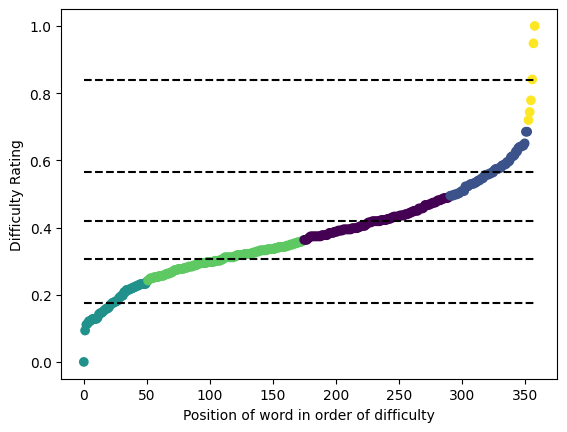

In [7]:
# Sort data points based on difficulty
sorted_indices = np.argsort(norm_result_column)
# Plot the data points
plt.scatter(np.arange(len(norm_result_column)), norm_result_column[sorted_indices], c=kmeans.labels_[sorted_indices], cmap='viridis')

# Plot the centroids as lines
for i in range(k):
    plt.plot(np.arange(len(norm_result_column)), np.full(len(norm_result_column), kmeans.cluster_centers_[i]), 'k--')



plt.xlabel('Position of word in order of difficulty')
plt.ylabel('Difficulty Rating')
plt.show()





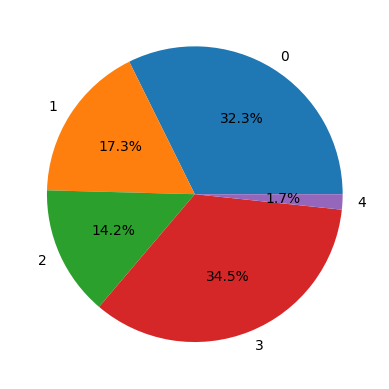

5
5


In [13]:
# Plot the above graph in pie chart form, with the slices showing the number of words in each cluster
# for i in range(len(kmeans.labels_)):
#     kmeans.labels_[i] += 1
plt.pie(np.bincount(kmeans.labels_), labels=np.arange(k), autopct='%1.1f%%')
plt.show()
print(k)
print(len(np.bincount(kmeans.labels_)))

In [9]:
# Print a table showing how many words are in each cluster, sorted in order of cluster number
cluster_labels = kmeans.labels_
cluster_counts = np.bincount(cluster_labels)
cluster_counts = np.vstack((np.arange(len(cluster_counts)), cluster_counts)).T
cluster_counts = cluster_counts[cluster_counts[:, 1].argsort()]
cluster_counts = cluster_counts[::-1]
cluster_counts = pd.DataFrame(cluster_counts, columns=['Cluster', 'Count'])
cluster_counts.sort_values(by='Cluster', inplace=True)
cluster_counts


,Cluster,Count
1,0,116
2,1,62
3,2,51
0,3,124
4,4,6


In [10]:
# Predicted difficulty rate for the word "EERIE"
eerie_percentages = [1.07508, 6.51769, 23.30265, 30.29725, 23.13552, 13.27519, 2.40859]
# Multiply each element by its index + 1
multiplied_values = [(i + 1) * value for i, value in enumerate(eerie_percentages[:6])]

# Sum the multiplied values
summed_values = sum(multiplied_values)

# Calculate the final result
result = (summed_values * sigmoid(omega_1)) + (sigmoid(omega_2) * eerie_percentages[-1])


# Normalize the result column to be between 0 and 1
norm_result = (result - result_column.min()) / (result_column.max() - result_column.min())
norm_result

0.321608096885813